In [65]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style

In [66]:
from sklearn.datasets import load_boston
boston = load_boston()

In [67]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [68]:
print(boston.data.shape)
print(boston.DESCR)
print(boston.feature_names)

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  

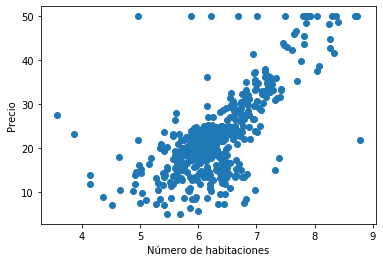

In [69]:
bostonpd = pd.DataFrame(boston.data)
print(bostonpd.head())
bostonpd.columns = boston.feature_names
print(bostonpd.head())
bostonpd["PRICE"] = boston.target
print(bostonpd.head())
plt.scatter(bostonpd.RM, bostonpd.PRICE)
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio')
plt.show()

In [70]:
X = np.array(bostonpd.drop(['PRICE'], 1))
X = preprocessing.scale(X)
y = np.array(bostonpd['PRICE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [71]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [72]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
# Predicción de nuestros modelos con SVR
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,13)

In [73]:
# Visualización de los resultados del SVR
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)
confidence = lr.score(X_test, y_test)
print('Confianza = ', confidence)

Confianza =  0.7189874466998118


In [75]:
predict = lr.predict(X_test)
resta = np.mean(y_test - predict)
print('Error = ',resta)


Error =  0.07951307727130277


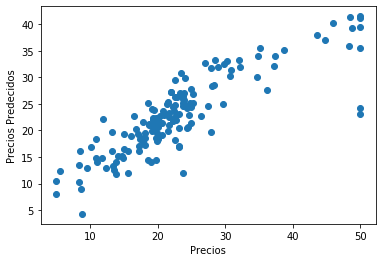

In [76]:
plt.scatter(y_test, predict)
plt.xlabel("Precios")
plt.ylabel("Precios Predecidos")
plt.show()

In [77]:
#hallando R^2
socore=1
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
  
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# YEISON DANIEL MANRIQUE CAMACHO 1150966